# Obtaining OAuth2 access

Installing requests and importing the required modules.

In [1]:
!pip install requests

In [3]:
import json
import requests

Saving the credentials to variables to access them more easily. These credentials are unique to each Spotify user.

In [15]:
client_id = ___________________________
client_secret = ______________________________

Encode the client secret using base 64 encoder online or import base64:

In [ ]:
encoded_client_creds = _________________________

Obtain the code that pops up in the URL bar when running the get_code.py Flask file. Enter your client ID and client secret, click the first submit button. It will redirect to the same page but with the code in the url bar.

In [66]:
code=___________________________________________

Creating variables and dicts to hold request info

In [67]:
import base64
auth_header = base64.urlsafe_b64encode(f'{client_id}:{client_secret}'.encode('ascii'))
token_url = "https://accounts.spotify.com/api/token"
token_data = {
    'grant_type':'authorization_code',
    'code': code,
    'redirect_uri': 'http://127.0.0.1:5000/' # running the get_code.py program locally
}
token_headers = {
    # "Authorization": f"Basic {encoded_client_creds}"
    'Authorization': f'Basic {auth_header.decode("ascii")}' # or just encoded_client_creds here
}

Sending POST request to obtain token and saving to token_response_data

In [68]:
r = requests.post(token_url, data=token_data, headers=token_headers)
print(r.json())
token_response_data = r.json()

{'access_token': 'BQDQ-VaCiZSMNrxPFP1k_5pXQdpWHfYwKF3ekFI5GHX6Acxr0BAKjDT7eQMxbscZh6apdmawBPnrlRS4QBpyAphqP0_qywdTNWCGbnCXLdn5moRWKg5YURDFi3y5t_9KbtOqYHhM48E644ge_FYzsnLSVglACxBcFyasM7wbVNvbnHHTenOK0q2y1wiucjkqYv1fYZE0z9Tq5YG8nQ6GxiBNjU-ypCX-hknPB7-6IN6S6k3fGHfMr6M3qmQrZuAU-VY1f4pXKODdyw', 'token_type': 'Bearer', 'expires_in': 3600, 'refresh_token': 'AQDqtYCVD6T69y0UKDJcA4EbPULUvdAUzMtPUNKtIuGWNk-LIqY2MuON_iDzVGl92Jvz2-h_bZbwdillDOTVVwJD8APMkynybeAbYvW2XKB3G1Qp-hSD3I6Udn4WLVke4mU', 'scope': 'user-library-read playlist-modify-private playlist-modify-public'}


Verifying that the access token can be accessed

In [69]:
token_response_data['access_token']

'BQDQ-VaCiZSMNrxPFP1k_5pXQdpWHfYwKF3ekFI5GHX6Acxr0BAKjDT7eQMxbscZh6apdmawBPnrlRS4QBpyAphqP0_qywdTNWCGbnCXLdn5moRWKg5YURDFi3y5t_9KbtOqYHhM48E644ge_FYzsnLSVglACxBcFyasM7wbVNvbnHHTenOK0q2y1wiucjkqYv1fYZE0z9Tq5YG8nQ6GxiBNjU-ypCX-hknPB7-6IN6S6k3fGHfMr6M3qmQrZuAU-VY1f4pXKODdyw'

Creating variables and dicts to hold playlist creation request info. Parameters can be found here https://developer.spotify.com/documentation/web-api/reference/create-playlist

In [70]:
user_id = ___________________ # substitute username as a string here
playlist_url = f"https://api.spotify.com/v1/users/{user_id}/playlists"
method = 'POST'
token_headers = {
    "Authorization": f"Bearer {token_response_data['access_token']}",
    "Content-Type": 'application/json'
}
token_data = { # stuff about the playlist
    "name": "New test playlist", 
    "description": "Test playlist description", 
    "public": False
}

Running this cell creates a new playlist!

In [71]:
r = requests.post(playlist_url, data=json.dumps(token_data), headers=token_headers)
print(r.json())
playlist_create_response = r.json()

{'collaborative': False, 'description': 'Test playlist description', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/5M3hQp6MmcEaCjhJHrtYb4'}, 'followers': {'href': None, 'total': 0}, 'href': 'https://api.spotify.com/v1/playlists/5M3hQp6MmcEaCjhJHrtYb4', 'id': '5M3hQp6MmcEaCjhJHrtYb4', 'images': [], 'name': 'New test playlist', 'owner': {'display_name': 'lauren sun', 'external_urls': {'spotify': 'https://open.spotify.com/user/jg5cbemqytn2p6s1xmvs87o8y'}, 'href': 'https://api.spotify.com/v1/users/jg5cbemqytn2p6s1xmvs87o8y', 'id': 'jg5cbemqytn2p6s1xmvs87o8y', 'type': 'user', 'uri': 'spotify:user:jg5cbemqytn2p6s1xmvs87o8y'}, 'primary_color': None, 'public': False, 'snapshot_id': 'MSwzNjkxMTI5OTBlNGJmNDQ3MjY1MWVmOTFjZGYzMzgzYTFjOGJhNGRi', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/5M3hQp6MmcEaCjhJHrtYb4/tracks', 'items': [], 'limit': 100, 'next': None, 'offset': 0, 'previous': None, 'total': 0}, 'type': 'playlist', 'uri': 'spotify:playlist:5M3hQp6MmcEaCjhJHrtY

# Adding Songs

Required parameters can be found here: https://developer.spotify.com/documentation/web-api/reference/add-tracks-to-playlist. Track ID is the string of characters obtained from right clicking a song > Share > Copy Song Link

In [130]:
playlist_id = playlist_create_response['id']
track_url = 'https://api.spotify.com/v1/playlists/0l3kgWSASnfizsRapfbzFZ/tracks?uris=spotify%3Atrack%3A12O9MpMmewwdDkxZC9uqvS'
headers = {
    'Authorization': F"Bearer {token_response_data['access_token']}",
    'Content-Type': 'application/json'
}
add_data = {
    'uris': ['string'],
    "position": 0
}

Send a request to add "Strange Weather" by Slaughter Beach, Dog to this playlist

In [131]:
r = requests.post(track_url, data=json.dumps(add_data), headers=headers)
print(r.json())
add_track_response = r.json()

{'snapshot_id': 'OCxlYWU4Y2UyYTg4ZGJlNGUzY2IzYmEyN2Y2MzkzZGMyM2VmOGU5YzZl'}


# Retrieving Saved Songs

From https://developer.spotify.com/documentation/web-api/reference/get-users-saved-tracks. Make sure that in the get_code.py file, there's a user-library-read in the scope line.

In [112]:
method = 'GET'
library_url = 'https://api.spotify.com/v1/me/tracks'
headers = {
    'Authorization': F"Bearer {token_response_data['access_token']}"
}
data = {
    "limit": 50
}

Note: this only imports 50 at most

In [113]:
saved_songs = requests.get(library_url, data, headers=headers)
print(saved_songs.json())

{'href': 'https://api.spotify.com/v1/me/tracks?offset=0&limit=50', 'items': [{'added_at': '2023-09-25T06:19:02Z', 'track': {'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1hLiboQ98IQWhpKeP9vRFw'}, 'href': 'https://api.spotify.com/v1/artists/1hLiboQ98IQWhpKeP9vRFw', 'id': '1hLiboQ98IQWhpKeP9vRFw', 'name': 'boygenius', 'type': 'artist', 'uri': 'spotify:artist:1hLiboQ98IQWhpKeP9vRFw'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', '

# Analyzing saved songs!

NOTE: this is still just for 50.
TODO: loop through until all songs retrieved into 1 df

In [104]:
import pandas as pd

Check how many songs we imported

In [167]:
songs = pd.DataFrame(saved_songs.json())
songs.shape

(50, 7)

What does one entry look like?

In [197]:
songs['items']# [0]['track']

0     {'added_at': '2023-09-25T06:19:02Z', 'track': ...
1     {'added_at': '2023-09-23T03:55:07Z', 'track': ...
2     {'added_at': '2023-09-23T03:54:47Z', 'track': ...
3     {'added_at': '2023-09-23T03:54:33Z', 'track': ...
4     {'added_at': '2023-09-23T03:33:10Z', 'track': ...
5     {'added_at': '2023-09-23T03:24:07Z', 'track': ...
6     {'added_at': '2023-09-23T03:20:38Z', 'track': ...
7     {'added_at': '2023-09-23T03:20:36Z', 'track': ...
8     {'added_at': '2023-09-23T03:08:42Z', 'track': ...
9     {'added_at': '2023-09-21T07:33:05Z', 'track': ...
10    {'added_at': '2023-09-21T07:33:04Z', 'track': ...
11    {'added_at': '2023-09-21T07:32:35Z', 'track': ...
12    {'added_at': '2023-09-09T06:22:49Z', 'track': ...
13    {'added_at': '2023-09-09T05:56:12Z', 'track': ...
14    {'added_at': '2023-09-09T04:46:59Z', 'track': ...
15    {'added_at': '2023-09-09T04:42:01Z', 'track': ...
16    {'added_at': '2023-09-06T06:45:54Z', 'track': ...
17    {'added_at': '2023-09-06T06:43:15Z', 'trac

Create list of song IDs

Iterate through each entry in `songs['items']` which really has all the song info. That song has `track` column, and that column's `id` column contains the id. Add them using a list comprehension

In [200]:
song_ids = [item['track']['id'] for item in songs['items']]
print(song_ids)

['03h0ioes0mfaZIeAO1fV5o', '26ccu0SzYbqDEwGSQI6glj', '3VqGaehn5DSpJnkTk6Pzar', '5kgWLcTGsGnPZXKYS8OiJX', '62L5qsFIDTjOUKpZYiylqh', '1fV8ecIh6Ng0PERg7UPYa2', '5SQgTu7aPw85eoknZtRRyT', '2ldF63PUVitRSB3TzEg8dU', '5h8twYp6D3Tus5XzNTjcvX', '64BbK9SFKH2jk86U3dGj2P', '4Szq4dulKN9bOvLRW6uMdZ', '34f3ywqmqe3lviftEL3o30', '3dCibkxTn3nvZVe7iPnfQ5', '7ab0dshQmFwArA3EKBOcs5', '0zjc5Ztwe2gSnrcju3qWER', '5V0sgougI0ZFxQB1wrocOC', '6unIOeUaYgBZ8TgCWNGDPX', '1t6JzKUfGZjoYDZIzkYqSm', '5rJmM8KbgLTmax0j3FacoM', '1H2wDDbwvouzM6DFNrkZrU', '3wvW8GIpS8Y95nCt2Wjt5t', '7BxRB28QvwQIsRJpB35Eu2', '3DbFOUKBDLagIPlMPYAs9W', '4BaFnIJJGI96NaxPyZ9HLy', '0W2CHYtNLuEBJCCuqOona7', '3xKsf9qdS1CyvXSMEid6g8', '7E4qUlNYocWix5FKBdw5CN', '4ZKgPZ9d4V5WW6H2s4qMD3', '7oLqKKca5rHLXCZjO0Os6A', '4tQnGMWK038EpGGhOFeyZO', '0H6m9OehghfHuDvhkSYbuc', '6COtyueVfTdNvfXc4l54Ia', '3r724ky0AzT9rtG6UrbUbA', '4t8DWlP3HlE8QmeDtdfZDc', '4BRzYmROhT3gPS9DxxKMQ7', '2flZMsajafACGYBmJRorrL', '6l85KxUJhnQofjIDbm1toY', '1KGQwsicpxAnfNmOvubfAP', '5KJHWZqPKn

## Get client_credentials access token

In [152]:
auth_header = base64.urlsafe_b64encode(f'{client_id}:{client_secret}'.encode('ascii'))
token_url = "https://accounts.spotify.com/api/token"
token_data = {
    'grant_type':'client_credentials',
    'code': code,
    'redirect_uri': 'http://127.0.0.1:5000/' # running the get_code.py program locally
}
token_headers = {
    # "Authorization": f"Basic {encoded_client_creds}"
    'Authorization': f'Basic {auth_header.decode("ascii")}' # or just encoded_client_creds here
}

In [153]:
r = requests.post(token_url, data=token_data, headers=token_headers)
print(r.json())
token_response_data = r.json()

{'access_token': 'BQC_EVsQTUeI1_0mWfwFyMyweJ9BACumFLUM3j1oIyVakxERlASu8eDnaBR1HhCrS6SsulJZth-n_6XjIFAI1g9aRqvl0Oz-nLPBBdvp5ABtPD8ZmsA', 'token_type': 'Bearer', 'expires_in': 3600}


Write the body of the request, now with the access token that has client_credentials permissions. Can't do the get request without switching to client_credentials

In [161]:
song_url = f"https://api.spotify.com/v1/audio-features/{id}"
headers = {
    'Authorization': F"Bearer {token_response_data['access_token']}",
    'Content-Type': 'application/json'
}

Loop through every ID in song_ids. Send an API call to get their features.
TODO: USE THE MULTIPLE SONGS ENDPOINT

In [ ]:
audio_features = [requests.get(f"https://api.spotify.com/v1/audio-features/{id}", headers=headers).json() for id in song_ids]

# df of audio features to analyze!

In [203]:
afdf = pd.DataFrame(audio_features)
afdf.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.543,0.507,10,-8.119,1,0.0269,0.3740,0.034300,0.110,0.193,100.130,audio_features,03h0ioes0mfaZIeAO1fV5o,spotify:track:03h0ioes0mfaZIeAO1fV5o,https://api.spotify.com/v1/tracks/03h0ioes0mfa...,https://api.spotify.com/v1/audio-analysis/03h0...,192071,4
1,0.576,0.758,4,-8.013,1,0.0420,0.0138,0.028000,0.231,0.842,122.815,audio_features,26ccu0SzYbqDEwGSQI6glj,spotify:track:26ccu0SzYbqDEwGSQI6glj,https://api.spotify.com/v1/tracks/26ccu0SzYbqD...,https://api.spotify.com/v1/audio-analysis/26cc...,182960,4
2,0.523,0.747,0,-7.533,1,0.0315,0.2330,0.000232,0.104,0.579,82.137,audio_features,3VqGaehn5DSpJnkTk6Pzar,spotify:track:3VqGaehn5DSpJnkTk6Pzar,https://api.spotify.com/v1/tracks/3VqGaehn5DSp...,https://api.spotify.com/v1/audio-analysis/3VqG...,201579,4
3,0.573,0.608,0,-8.750,1,0.0241,0.0728,0.447000,0.137,0.527,75.401,audio_features,5kgWLcTGsGnPZXKYS8OiJX,spotify:track:5kgWLcTGsGnPZXKYS8OiJX,https://api.spotify.com/v1/tracks/5kgWLcTGsGnP...,https://api.spotify.com/v1/audio-analysis/5kgW...,208818,4
4,0.666,0.671,2,-10.027,1,0.0621,0.1250,0.181000,0.123,0.588,103.008,audio_features,62L5qsFIDTjOUKpZYiylqh,spotify:track:62L5qsFIDTjOUKpZYiylqh,https://api.spotify.com/v1/tracks/62L5qsFIDTjO...,https://api.spotify.com/v1/audio-analysis/62L5...,533781,4


## plot stuff

In [208]:
import matplotlib.pyplot as plt

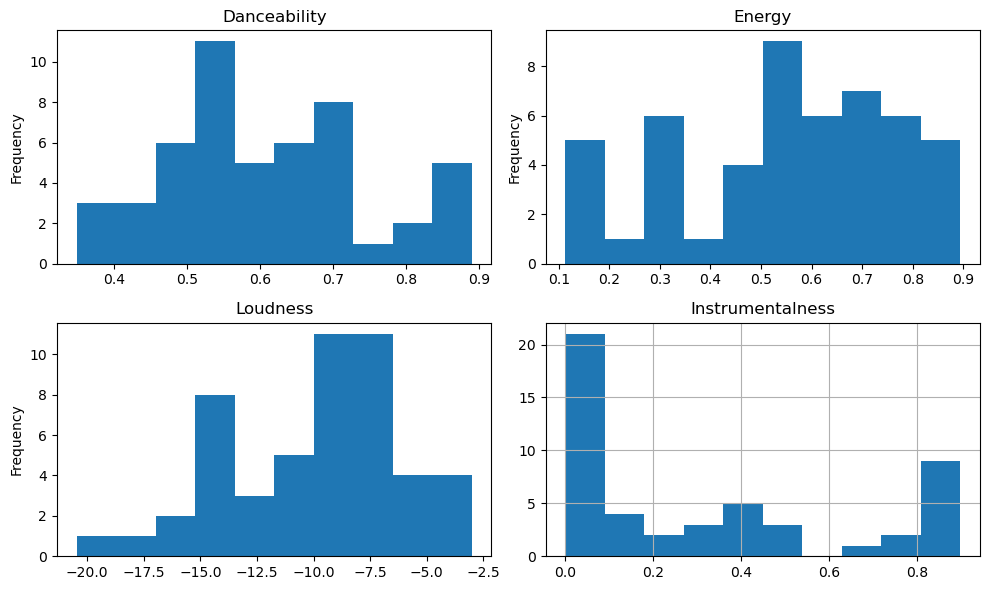

In [220]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
afdf['danceability'].plot.hist(ax=axes[0, 0])
axes[0,0].set_title('Danceability')
afdf['energy'].plot.hist(ax=axes[0, 1])
axes[0,1].set_title('Energy')
afdf['loudness'].plot.hist(ax=axes[1, 0])
axes[1,0].set_title('Loudness')
afdf['instrumentalness'].hist(ax=axes[1, 1])
axes[1,1].set_title('Instrumentalness')

plt.tight_layout()


## stat stuff